In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


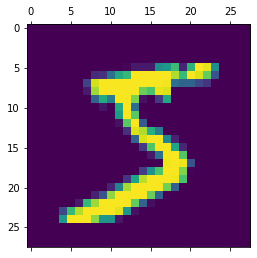

In [17]:
plt.matshow(x_train[0])

In [18]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6464 - accuracy: 0.8385 - val_loss: 0.3563 - val_accuracy: 0.9014
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.9075 - val_loss: 0.2890 - val_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2861 - accuracy: 0.9196 - val_loss: 0.2609 - val_accuracy: 0.9278
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570 - accuracy: 0.9279 - val_loss: 0.2362 - val_accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9343 - val_loss: 0.2211 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9393 - val_loss: 0.2056 - val_accuracy: 0.9406
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9439 - val_loss: 0.1926 - val_accuracy:

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9517
Loss=0.164
Accuracy=0.952


<function matplotlib.pyplot.show(close=None, block=None)>

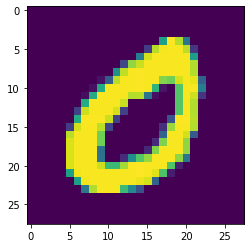

In [15]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [16]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 966    0    1    2    0    4    5    1    1    0]
 [   0 1117    2    2    0    1    3    2    8    0]
 [   8    1  973    8    8    2    5   11   15    1]
 [   2    1    9  965    0   12    0   10    9    2]
 [   2    1    5    0  933    0   11    3    3   24]
 [   9    2    1   19    3  827   13    3   12    3]
 [   9    3    2    1    6   10  923    1    3    0]
 [   2    9   18    6    3    1    0  972    2   15]
 [   5    3    4   14    6    6    9    9  914    4]
 [   9    8    1   15   29    4    1   10    5  927]], shape=(10, 10), dtype=int32)
